# Toquetear el csv

In [2]:
# Toquetear el csv

In [3]:
# Read contratacion_data.csv
import pandas as pd
df = pd.read_csv("data/contratacion_data.csv")

In [4]:
print(df.describe(include='all'))

                         pdf company amount currency adjudicadora       tipo  \
count                     65      65     65       65           65         65   
unique                    65      42     51        4           43         14   
top     BOE-B-2017-70670.pdf    None   None    euros         None  Servicios   
freq                       1      20     14       48           11         33   

       tramitacion procedimiento  
count           65            65  
unique           3             6  
top      Ordinaria       Abierto  
freq            57            58  


Servicios                        33
Suministros                       7
Servicio                          4
None                              4
Suministro                        4
Contrato de Servicios             3
Contrato de obras                 2
Obras                             2
Administrativo de Servicio        1
Administrativo Especial           1
Contrato de suministro            1
Servicis                          1
Administrativo especial           1
Gestión de servicios públicos     1
Name: tipo, dtype: int64


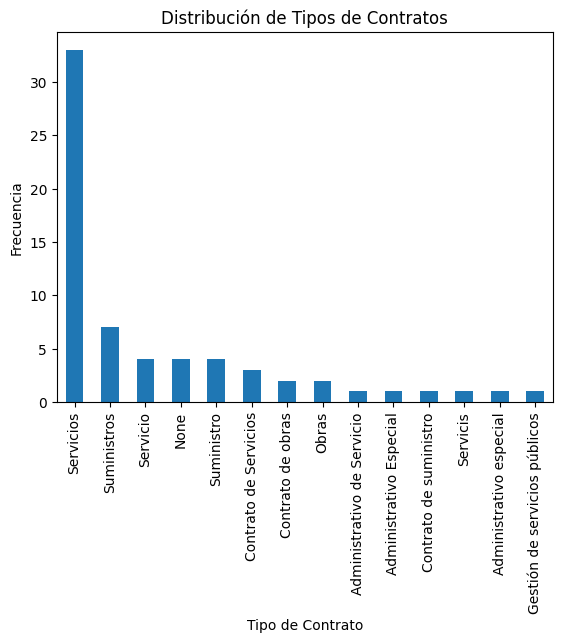

Revisar y limpiar datos de 'amount' para análisis.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de frecuencia de tipos de contratos
print(df['tipo'].value_counts())

# Visualización de los tipos de contrato
df['tipo'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Contratos')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de montos de contrato si 'amount' y 'currency' están limpios y convertidos adecuadamente
if df['amount'].dtype == float:
    plt.figure(figsize=(10, 6))
    df['amount'].hist(bins=20)
    plt.title('Distribución de Montos de Contrato')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Revisar y limpiar datos de 'amount' para análisis.")


In [6]:
df["amount"].unique()

array(['None', '30000000.0', '1500000.0', '2008806.15', '4417778.64',
       '172546.0', '308730.29', '1355831.81', '1211710.0', '370000.0',
       '174560.65', '483393.79', '565811.04', '4524000.0', '561440.0',
       '520000.0', '122993.55', '175111.2', '2899125.0', '1865578.0',
       '139440.0', '18550000.0', '365420.0', '4718300.0', '2000000.0',
       '1720787363.63', '236250.0', '486840.0', '239423.08', '882644.62',
       '780000.0', '459800.0', '2208890.32', '232320.0', '154674.0',
       '786500.0', '415119.24', '203280.0', '3417375.02', '149720.0',
       '18398840.0', '5027182.89', '451230.96', '647785.75', '2132010.64',
       '181500.0', '143260.0', '1332450.0', '268382.44', '434680.96',
       '779861.46'], dtype=object)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir 'None' a NaN y cambiar el tipo de la columna a float
df['amount'] = df['amount'].replace('None', np.nan).astype(float)

# Verificar los cambios
print(df['amount'].unique())


[           nan 3.00000000e+07 1.50000000e+06 2.00880615e+06
 4.41777864e+06 1.72546000e+05 3.08730290e+05 1.35583181e+06
 1.21171000e+06 3.70000000e+05 1.74560650e+05 4.83393790e+05
 5.65811040e+05 4.52400000e+06 5.61440000e+05 5.20000000e+05
 1.22993550e+05 1.75111200e+05 2.89912500e+06 1.86557800e+06
 1.39440000e+05 1.85500000e+07 3.65420000e+05 4.71830000e+06
 2.00000000e+06 1.72078736e+09 2.36250000e+05 4.86840000e+05
 2.39423080e+05 8.82644620e+05 7.80000000e+05 4.59800000e+05
 2.20889032e+06 2.32320000e+05 1.54674000e+05 7.86500000e+05
 4.15119240e+05 2.03280000e+05 3.41737502e+06 1.49720000e+05
 1.83988400e+07 5.02718289e+06 4.51230960e+05 6.47785750e+05
 2.13201064e+06 1.81500000e+05 1.43260000e+05 1.33245000e+06
 2.68382440e+05 4.34680960e+05 7.79861460e+05]


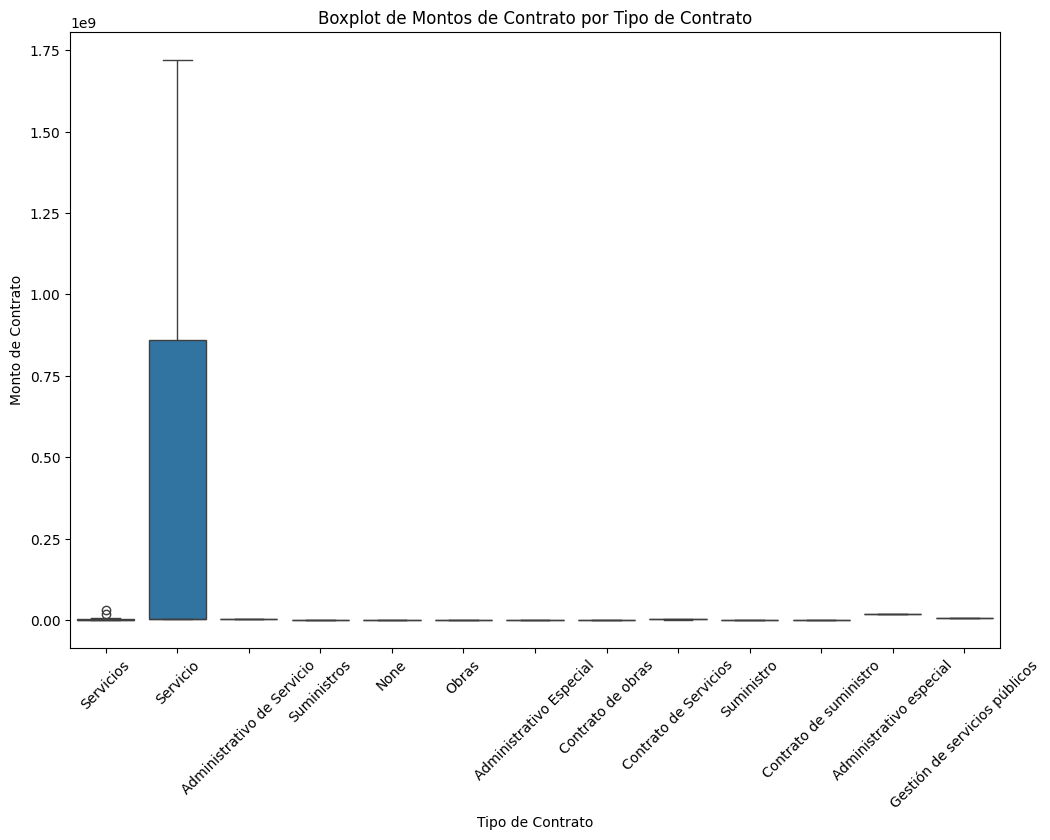

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar filas con valores NaN en 'amount' para evitar errores en la visualización
df_clean = df.dropna(subset=['amount'])

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_clean)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()

In [9]:
# Establecer un umbral para filtrar valores atípicos extremos
# Aquí usamos el cuantil 0.99 como umbral, eliminando cualquier valor por encima de este
threshold = df['amount'].quantile(0.9)
df_filtered = df[df['amount'] <= threshold]

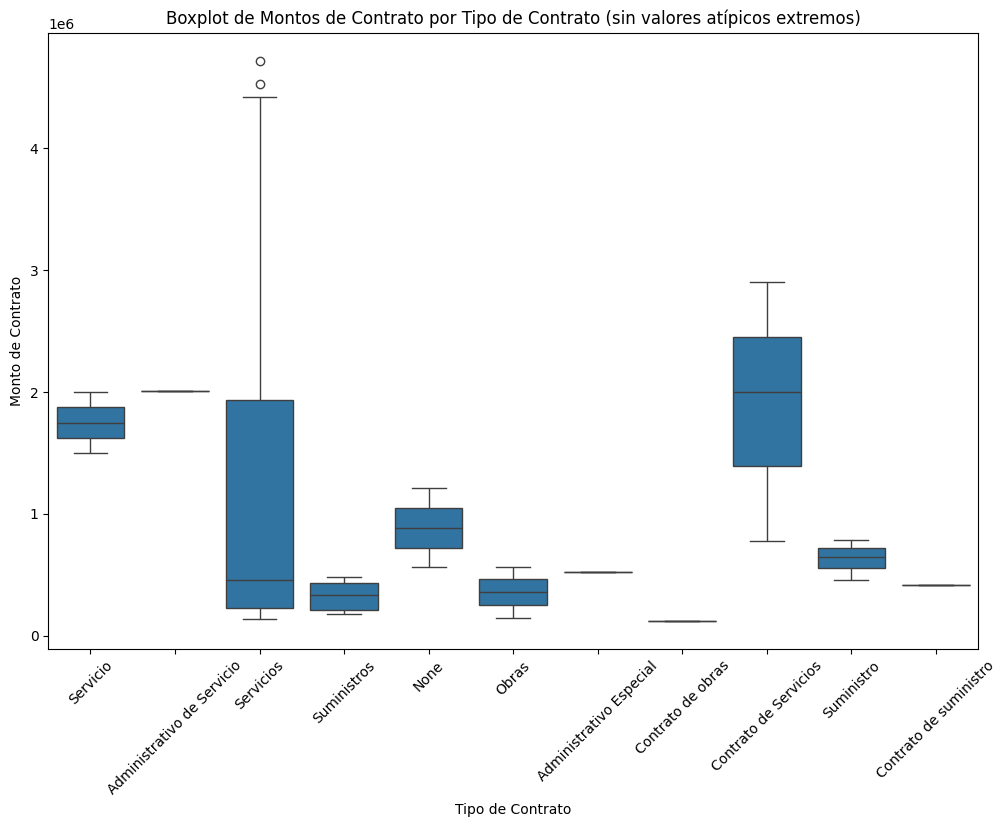

In [10]:
# Crear el boxplot filtrado
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_filtered)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato (sin valores atípicos extremos)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()

## Anadimos la fecha

In [11]:
# Leer xml_id_fecha.json
import json
with open('xml_id_fecha.json', 'r') as file:
    xml_id_fecha = json.load(file)

In [12]:
# Función para extraer el ID desde el nombre del archivo PDF
def extract_id_from_pdf(pdf_name):
    # Quitamos la extensión y cualquier prefijo conocido
    return pdf_name.replace('.pdf', '')

In [20]:
def assign_date(pdf):
    # Extraer el ID del PDF
    pdf_id = extract_id_from_pdf(pdf_name=pdf)
    # Buscar la fecha correspondiente en el diccionario
    if pdf_id in xml_id_fecha:
        return xml_id_fecha[pdf_id]
    else:
        return None

In [21]:
# Aplicar esta función para extraer el ID y luego buscar la fecha de publicación correspondiente
df['publication_date'] = df['pdf'].apply(assign_date)

# Mostrar el resultado
df.head()

,pdf,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,publication_date
0,BOE-B-2017-70670.pdf,UTE OESIA PGR ASOCIADOS,NaN,None,Agencia Estatal de Investigación,Servicios,Ordinaria,Abierto,None
1,BOE-B-2015-37752.pdf,UTE: Paymacotas Extremadura sl - Getinsa Payma...,30000000.00,euros,Junta de Extremadura. Consejería de Economía e...,Servicios,Ordinaria,Abierto,None
2,BOE-B-2017-24396.pdf,Always School of Languages,1500000.00,euros,Excmo. Cabildo Insular de Tenerife,Servicio,Ordinaria,Abierto,None
3,BOE-B-2016-67178.pdf,None,2008806.15,euros,Ayuntamiento de Getafe,Administrativo de Servicio,Ordinaria,Abierto,None
4,BOE-B-2015-34448.pdf,None,NaN,None,Instituto de Mayores y Servicios Sociales,Servicios,Ordinaria,Abierto,None


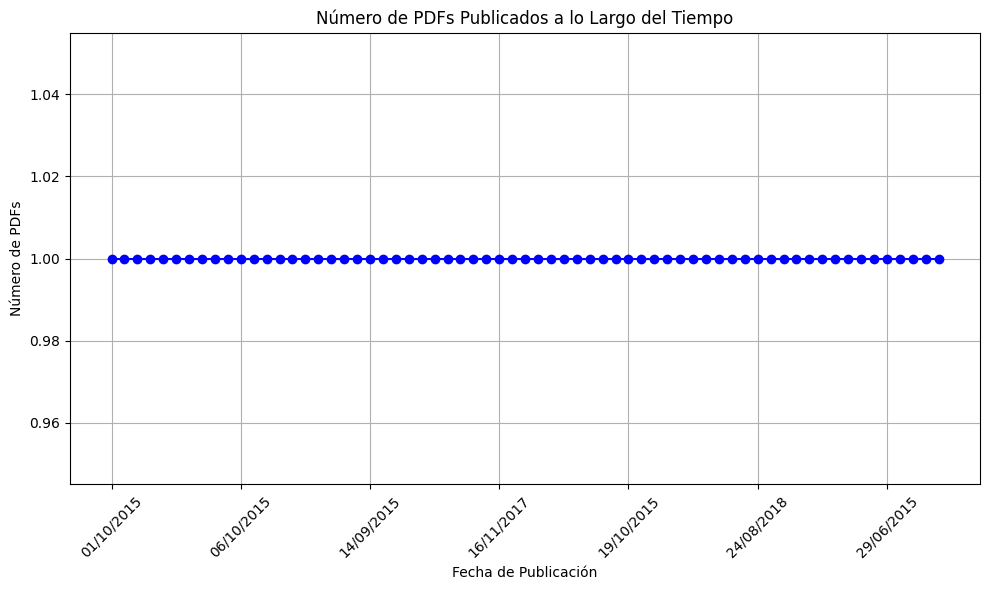

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Agrupar por la fecha de publicación y contar el número de PDFs
pdf_counts = df.groupby('publication_date').size()

# Crear la gráfica
plt.figure(figsize=(10, 6))
pdf_counts.plot(kind='line', marker='o', color='b')
plt.title('Número de PDFs Publicados a lo Largo del Tiempo')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de PDFs')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama para dar espacio a los labels

# Mostrar la gráfica
plt.show()

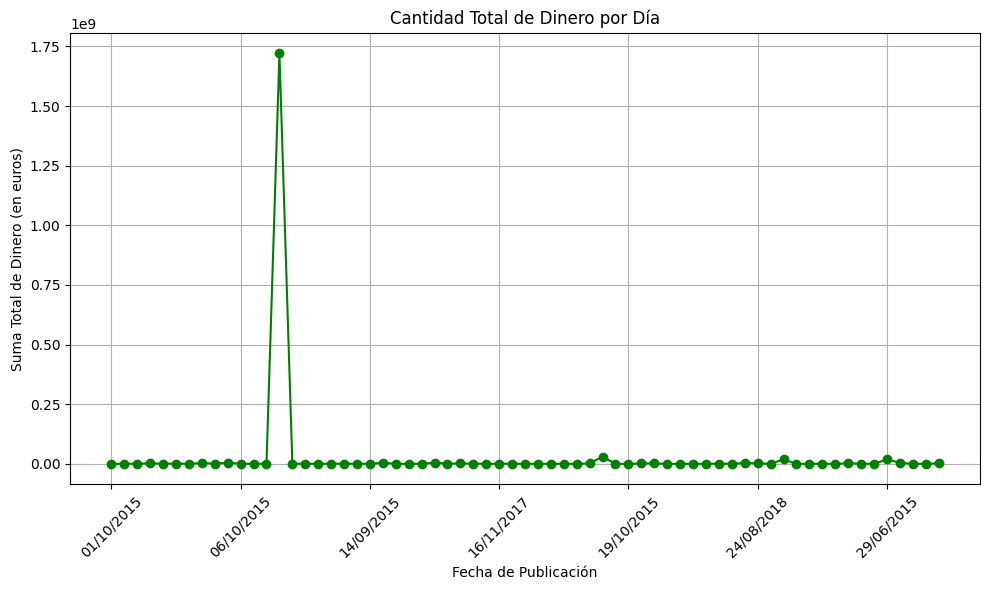

In [ ]:
# Agrupar por la fecha de publicación y sumar las cantidades de dinero
money_sum = df.groupby('publication_date')['amount'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
money_sum.plot(kind='line', marker='o', color='green')
plt.title('Cantidad Total de Dinero por Día')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Suma Total de Dinero (en euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama

# Mostrar la gráfica
plt.show()

In [ ]:
# Establecer un umbral para filtrar valores atípicos extremos
# Aquí usamos el cuantil 0.99 como umbral, eliminando cualquier valor por encima de este
threshold = df['amount'].quantile(0.9)
df_filtered = df[df['amount'] <= threshold]

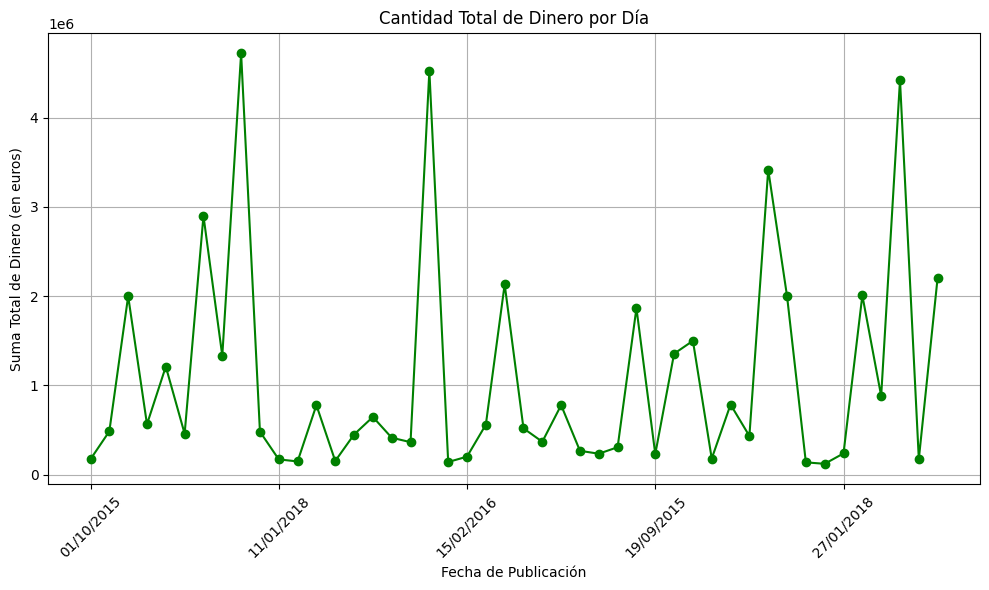

In [ ]:
# Agrupar por la fecha de publicación y sumar las cantidades de dinero
money_sum = df_filtered.groupby('publication_date')['amount'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
money_sum.plot(kind='line', marker='o', color='green')
plt.title('Cantidad Total de Dinero por Día')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Suma Total de Dinero (en euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama

# Mostrar la gráfica
plt.show()

In [ ]:
# Save df to csv
df.to_csv("data/contratacion_data_dates.csv", index=False)

NameError: name 'df' is not defined

# Analisis de datos mes 08 2017

In [4]:
# Read contratacion_data.csv
import pandas as pd
df = pd.read_csv("data/contratacion_data_08-2017.csv")
# BOE-B-2017-47153.pdf Problematico 
# BOE-B-2017-48881.pdf Problematico por coma

In [5]:
# Attempt to convert 'amount' to a numeric type
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [6]:
df

,pdf,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2017-48462.pdf,Ernst & Young S.L.,156356.20,euros,Consejería de Hacienda y Administración Pública,Servicios,Ordinaria,Abierto,lama3,111.00
1,BOE-B-2017-47989.pdf,Astilleros Zamakona Pasaia S.L.,321699.58,euros,Autoridad Portuaria de Pasaia,Servicios,Ordinaria,Abierto,lama3,111.00
2,BOE-B-2017-49740.pdf,Burger King Spain S.L.,37628.17,€,Ayuntamiento de Leganés,Concesión dominio público,Ordinaria,Abierta,NaN,NaN
3,BOE-B-2017-49218.pdf,Viva Copier Granada S.L.,1349342.45,euros,Servicio Andaluz de Salud,Servicios,Ordinaria,Abierto,lama3,111.00
4,BOE-B-2017-47221.pdf,REPSOL LUBRICANTES Y ESPECIALIDADES S.A.,389136.00,euros,Dirección de Abastecimiento y Transportes de l...,Suministros,Ordinaria,Abierto,lama3,111.00
...,...,...,...,...,...,...,...,...,...,...
164,BOE-B-2017-49497.pdf,INFORMATICA EL CORTE INGLES S. A.,NaN,None,Dirección General de la Marina Mercante,Contrato de Servicios,Ordinaria,Abierto,llama3,98.36
165,BOE-B-2017-47492.pdf,Servinform S.A.,120000.00,euros,Consejería de Educación,Servicios,Ordinaria,Abierto,llama3,77.90
166,BOE-B-2017-47486.pdf,None,2480500.00,Euros,Autoritat del Transport Metropolità,Servicios,Ordinaria,Abierto,llama3,103.30
167,BOE-B-2017-49326.pdf,Gestión de Escuelas Infantiles S.L.,1966608.00,euros,None,Servicios,Ordinaria,Abierto,llama3,113.07


In [27]:
print(df.describe(include='all'))

                         pdf company        amount currency adjudicadora  \
count                    169     169  1.490000e+02      169          169   
unique                   169     127           NaN        4          113   
top     BOE-B-2017-48462.pdf    None           NaN    euros         None   
freq                       1      40           NaN      139           13   
mean                     NaN     NaN  2.469883e+06      NaN          NaN   
std                      NaN     NaN  8.715426e+06      NaN          NaN   
min                      NaN     NaN  6.000000e+02      NaN          NaN   
25%                      NaN     NaN  2.600000e+05      NaN          NaN   
50%                      NaN     NaN  4.936750e+05      NaN          NaN   
75%                      NaN     NaN  1.384849e+06      NaN          NaN   
max                      NaN     NaN  8.076146e+07      NaN          NaN   

             tipo tramitacion procedimiento   model        time  
count         169    

Servicios                                                                                       66
Suministro                                                                                      22
Suministros                                                                                     19
Obras                                                                                           17
Servicio                                                                                        11
Contrato de suministro                                                                          10
None                                                                                             5
Contrato de Servicios                                                                            4
Contrato de obras                                                                                2
Autorización demanial                                                                            1
Contrato M

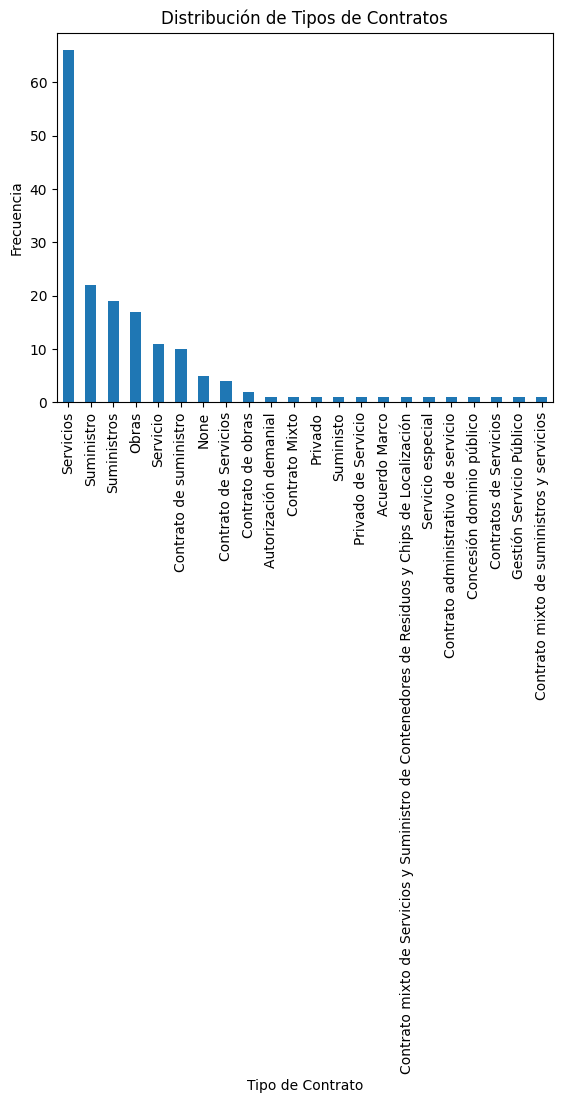

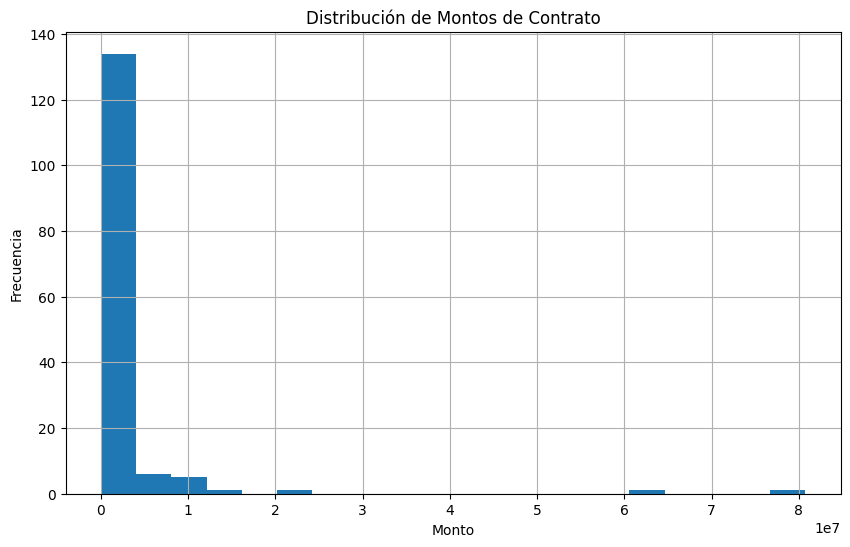

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de frecuencia de tipos de contratos
print(df['tipo'].value_counts())

# Visualización de los tipos de contrato
df['tipo'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Contratos')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de montos de contrato si 'amount' y 'currency' están limpios y convertidos adecuadamente
if df['amount'].dtype == float:
    plt.figure(figsize=(10, 6))
    df['amount'].hist(bins=20)
    plt.title('Distribución de Montos de Contrato')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Revisar y limpiar datos de 'amount' para análisis.")


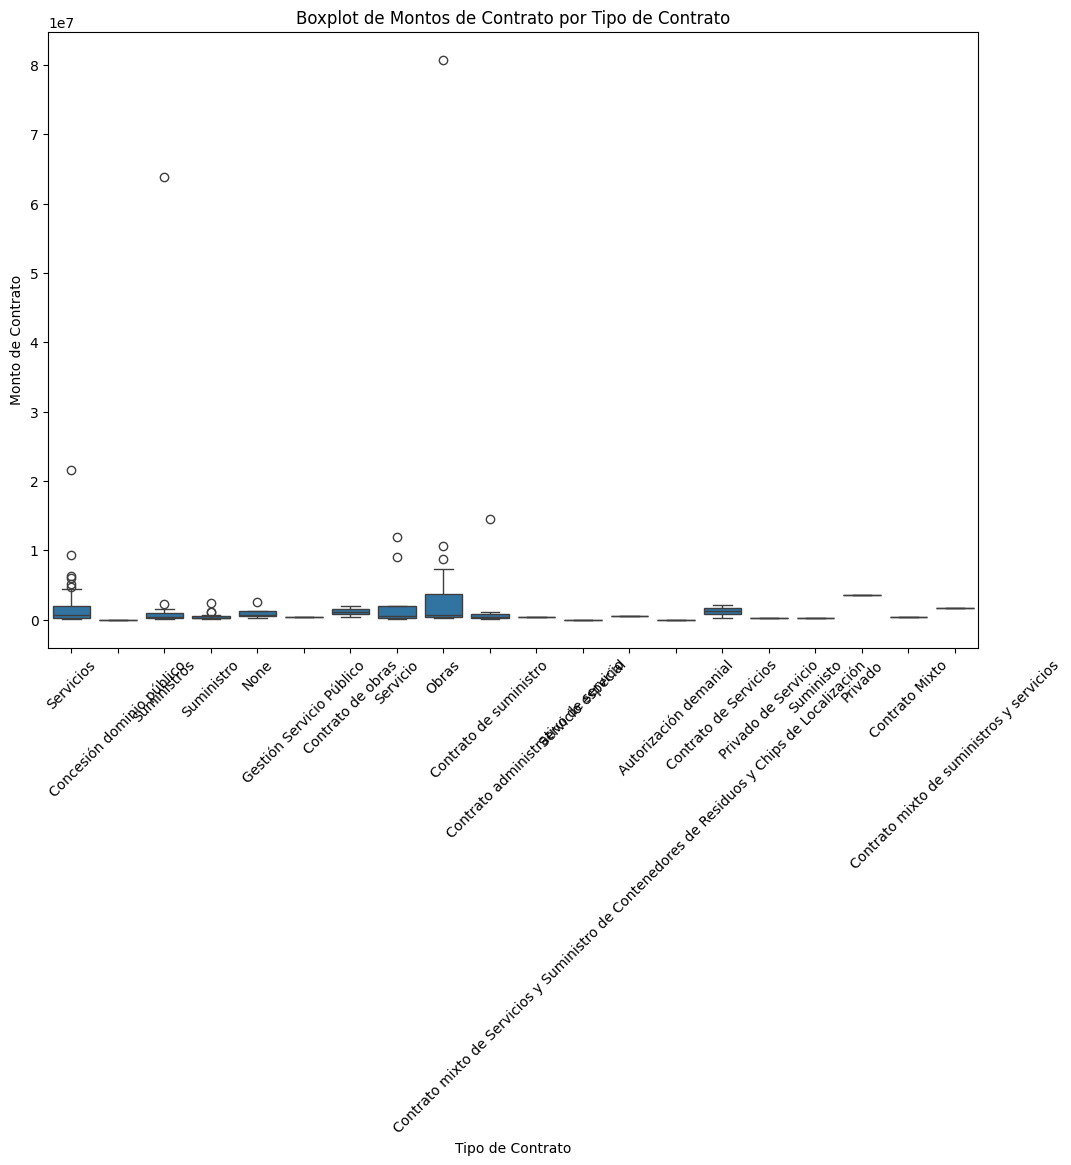

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar filas con valores NaN en 'amount' para evitar errores en la visualización
df_clean = df.dropna(subset=['amount'])

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_clean)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()

In [9]:
# Establecer un umbral para filtrar valores atípicos extremos
# Aquí usamos el cuantil 0.99 como umbral, eliminando cualquier valor por encima de este
threshold = df['amount'].quantile(0.9)
df_filtered = df[df['amount'] <= threshold]

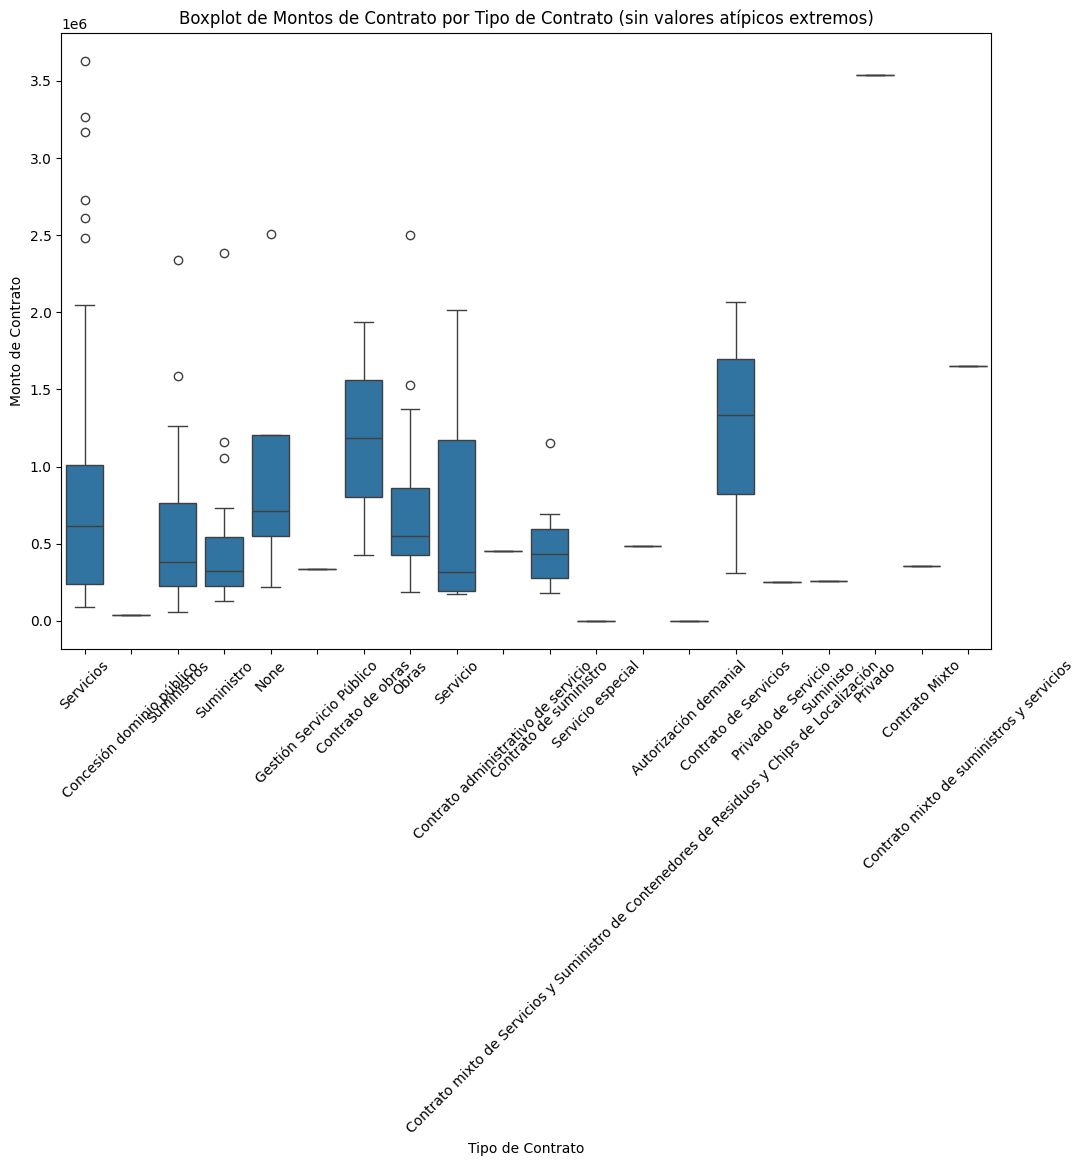

In [31]:
# Crear el boxplot filtrado
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo', y='amount', data=df_filtered)
plt.title('Boxplot de Montos de Contrato por Tipo de Contrato (sin valores atípicos extremos)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Monto de Contrato')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización
plt.show()

## Anadimos fecha

In [10]:
# Leer xml_id_fecha.json
import json
with open('xml_id_fecha_filtered_08-2017.json', 'r') as file:
    xml_id_fecha = json.load(file)


def assign_date(pdf, xml_id_fecha):
    for elto in xml_id_fecha:
        date = elto['date']
        items = elto['items']
        for item in items:
            id_item = item[0]
            id = pdf.replace('.pdf', '')
            if id == id_item:
                return date
    return None


# Aplicar esta función para extraer el ID y luego buscar la fecha de publicación correspondiente
df['publication_date'] = df['pdf'].apply(assign_date, xml_id_fecha=xml_id_fecha)

# Mostrar el resultado
df.head()

,pdf,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,publication_date
0,BOE-B-2017-48462.pdf,Ernst & Young S.L.,156356.20,euros,Consejería de Hacienda y Administración Pública,Servicios,Ordinaria,Abierto,lama3,111.0,14/08/2017
1,BOE-B-2017-47989.pdf,Astilleros Zamakona Pasaia S.L.,321699.58,euros,Autoridad Portuaria de Pasaia,Servicios,Ordinaria,Abierto,lama3,111.0,09/08/2017
2,BOE-B-2017-49740.pdf,Burger King Spain S.L.,37628.17,€,Ayuntamiento de Leganés,Concesión dominio público,Ordinaria,Abierta,NaN,NaN,31/08/2017
3,BOE-B-2017-49218.pdf,Viva Copier Granada S.L.,1349342.45,euros,Servicio Andaluz de Salud,Servicios,Ordinaria,Abierto,lama3,111.0,24/08/2017
4,BOE-B-2017-47221.pdf,REPSOL LUBRICANTES Y ESPECIALIDADES S.A.,389136.00,euros,Dirección de Abastecimiento y Transportes de l...,Suministros,Ordinaria,Abierto,lama3,111.0,04/08/2017


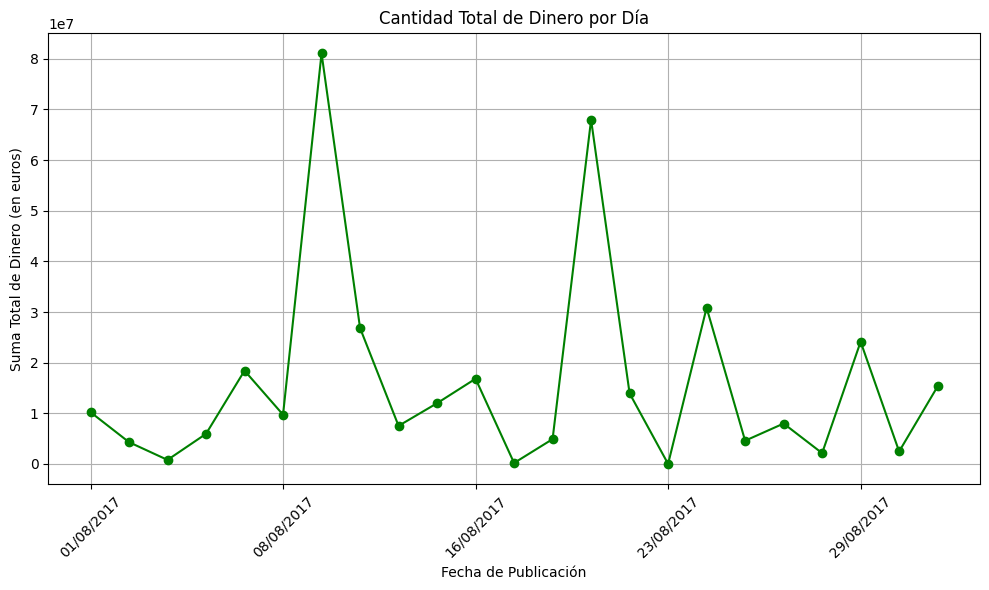

In [11]:
# Agrupar por la fecha de publicación y sumar las cantidades de dinero
money_sum = df.groupby('publication_date')['amount'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
money_sum.plot(kind='line', marker='o', color='green')
plt.title('Cantidad Total de Dinero por Día')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Suma Total de Dinero (en euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama

# Mostrar la gráfica
plt.show()

## Time

In [12]:
# Display basic statistics of the 'time' column
time_stats = df['time'].describe()

time_stats


count    168.000000
mean      95.872917
std       21.633978
min       64.300000
25%       79.570000
50%       91.525000
75%      108.617500
max      180.730000
Name: time, dtype: float64

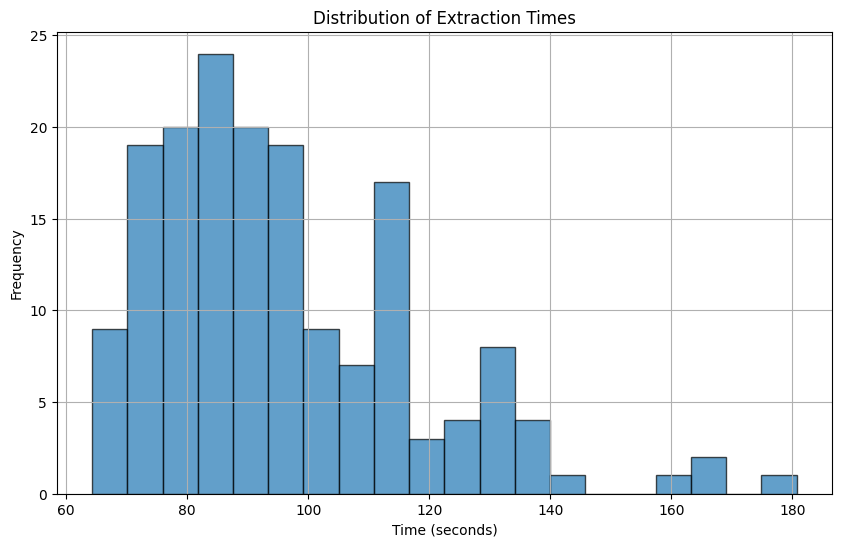

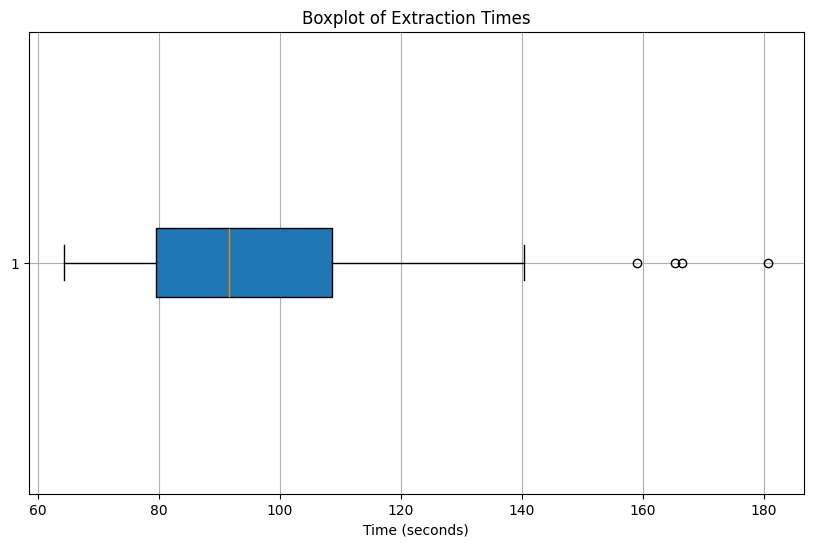

In [13]:
import matplotlib.pyplot as plt

# Create a histogram of the 'time' column
plt.figure(figsize=(10, 6))
plt.hist(df['time'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Extraction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot of the 'time' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['time'].dropna(), vert=False, patch_artist=True)
plt.title('Boxplot of Extraction Times')
plt.xlabel('Time (seconds)')
plt.grid(True)
plt.show()


In [18]:
df.shape

(169, 11)

### Study relation extraction time with length text

In [22]:
# Let's ensure all necessary data is loaded again from scratch and reattempt the entire process
import json
import pandas as pd

# Load the JSON file
json_file_path = 'data/contratacion_data_08-2017.json'
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

# Load the CSV file
csv_file_path = 'data/contratacion_data_08-2017.csv'
csv_data = pd.read_csv(csv_file_path)

# Adjust the logic to correctly calculate the length of the text in the JSON entries
json_list = []
for entry in json_data:
    pdf = entry['pdf']
    text_length = 0
    for field in entry.values():
        if isinstance(field, dict):
            for value in field.values():
                text_length += len(value)
        else:
            text_length += len(field)
    json_list.append({'pdf': pdf, 'text_length': text_length})

json_df = pd.DataFrame(json_list)
print(json_list)
# Merge the CSV data with the JSON data on the 'pdf' column
merged_data = pd.merge(csv_data, json_df, on='pdf')

# Perform a statistical analysis on the relationship between 'text_length' and 'time'
correlation = merged_data['text_length'].corr(merged_data['time'])
stats_summary = merged_data[['text_length', 'time']].describe()

correlation, stats_summary


[{'pdf': 'BOE-B-2017-48462.pdf', 'text_length': 1897}, {'pdf': 'BOE-B-2017-47989.pdf', 'text_length': 2073}, {'pdf': 'BOE-B-2017-49740.pdf', 'text_length': 1216}, {'pdf': 'BOE-B-2017-49218.pdf', 'text_length': 1535}, {'pdf': 'BOE-B-2017-47221.pdf', 'text_length': 1542}, {'pdf': 'BOE-B-2017-49224.pdf', 'text_length': 1605}, {'pdf': 'BOE-B-2017-48890.pdf', 'text_length': 1741}, {'pdf': 'BOE-B-2017-49230.pdf', 'text_length': 1734}]


(nan,
        text_length   time
 count     8.000000    7.0
 mean   1667.875000  111.0
 std     258.564409    0.0
 min    1216.000000  111.0
 25%    1540.250000  111.0
 50%    1669.500000  111.0
 75%    1780.000000  111.0
 max    2073.000000  111.0)

In [24]:
100*60*60/110

3272.7272727272725

In [20]:
merged_data.shape
merged_data

,pdf,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,text_length
0,BOE-B-2017-48462.pdf,Ernst & Young S.L.,156356.2,euros,Consejería de Hacienda y Administración Pública,Servicios,Ordinaria,Abierto,lama3,111.0,1897
1,BOE-B-2017-47989.pdf,Astilleros Zamakona Pasaia S.L.,321699.58,euros,Autoridad Portuaria de Pasaia,Servicios,Ordinaria,Abierto,lama3,111.0,2073
2,BOE-B-2017-49740.pdf,Burger King Spain S.L.,37628.17,€,Ayuntamiento de Leganés,Concesión dominio público,Ordinaria,Abierta,NaN,NaN,1216
3,BOE-B-2017-49218.pdf,Viva Copier Granada S.L.,1349342.45,euros,Servicio Andaluz de Salud,Servicios,Ordinaria,Abierto,lama3,111.0,1535
4,BOE-B-2017-47221.pdf,REPSOL LUBRICANTES Y ESPECIALIDADES S.A.,389136.0,euros,Dirección de Abastecimiento y Transportes de l...,Suministros,Ordinaria,Abierto,lama3,111.0,1542
5,BOE-B-2017-49224.pdf,Asime S.A.,2022440.0,euros,Servicio Canario de la Salud,Servicios,Anticipada,Abierto,lama3,111.0,1605
6,BOE-B-2017-48890.pdf,Reddy Pharma Iberia S.A.,None,None,Servicio Canario de la Salud,Contrato de suministro,Ordinaria,Abierto,lama3,111.0,1741
7,BOE-B-2017-49230.pdf,Servicios Microinformática S.A.,368519.67,euros,Servicio Madrileño de Salud. Hospital Universi...,Suministros,Ordinaria,Abierto,lama3,111.0,1734


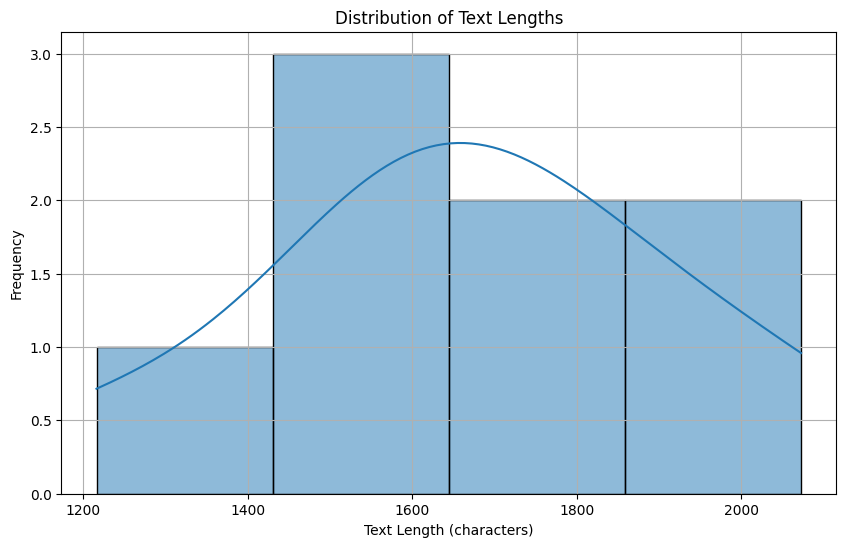

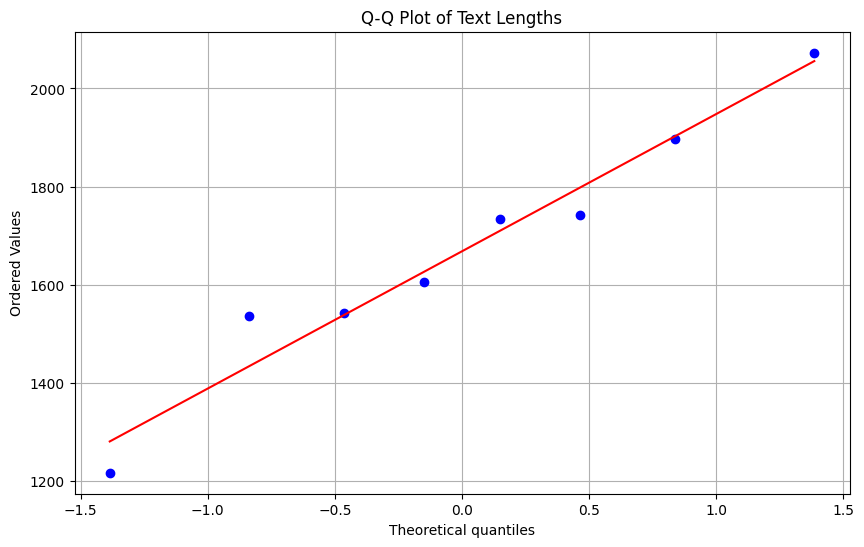

ShapiroResult(statistic=0.974077342206843, pvalue=0.9279412134482036)

In [16]:
import seaborn as sns
import scipy.stats as stats

# Plot the distribution of 'text_length'
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q-Q plot to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(merged_data['text_length'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Text Lengths')
plt.grid(True)
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(merged_data['text_length'])

shapiro_test


pvalue>0.05 No podemos rechazar que la distribucion del tiempo siga una normal. 

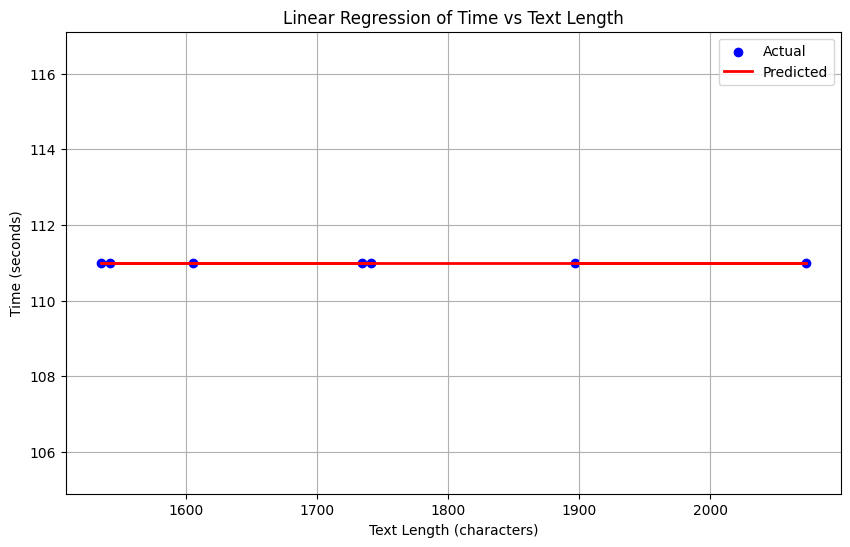

1.0

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Remove rows with NaN values in the 'time' column
cleaned_data = merged_data.dropna(subset=['time'])

# Prepare the data for linear regression
X = cleaned_data[['text_length']]
y = cleaned_data['time']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the time using the model
y_pred = model.predict(X)

# Calculate the R^2 score of the model
r2 = r2_score(y, y_pred)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression of Time vs Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

r2
